# Matplotlib

Author: Manuel Dalcastagnè. This work is licensed under a CC Attribution 3.0 Unported license (http://creativecommons.org/licenses/by/3.0/).

Original material, "Matplotlib - 2D and 3D plotting in Python", was created by J.R. Johansson under the CC Attribution 3.0 Unported license (http://creativecommons.org/licenses/by/3.0/) and can be found at https://github.com/jrjohansson/scientific-python-lectures.

In [2]:
# to configure matplotlib to embed figures in the notebook:
%matplotlib inline

## Introduction

Matplotlib is a 2D and 3D graphics library for generating scientific figures using Python. Among its main features:

* Support for $\LaTeX$ expressions
* High-quality output in many formats, including PNG, PDF and SVG

To use `matplotlib`, import the `pyplot` package from the module:

In [13]:
import matplotlib.pyplot as plt

## The matplotlib API

Everything in matplotlib is organized in a **hierarchy**, where different objects are put together to build a plot. The main objects used to build a plot are:
* **Figure**, the container of the whole figure
* **Axes**, the region of the image with the data space

Take a look at the following example of a figure:

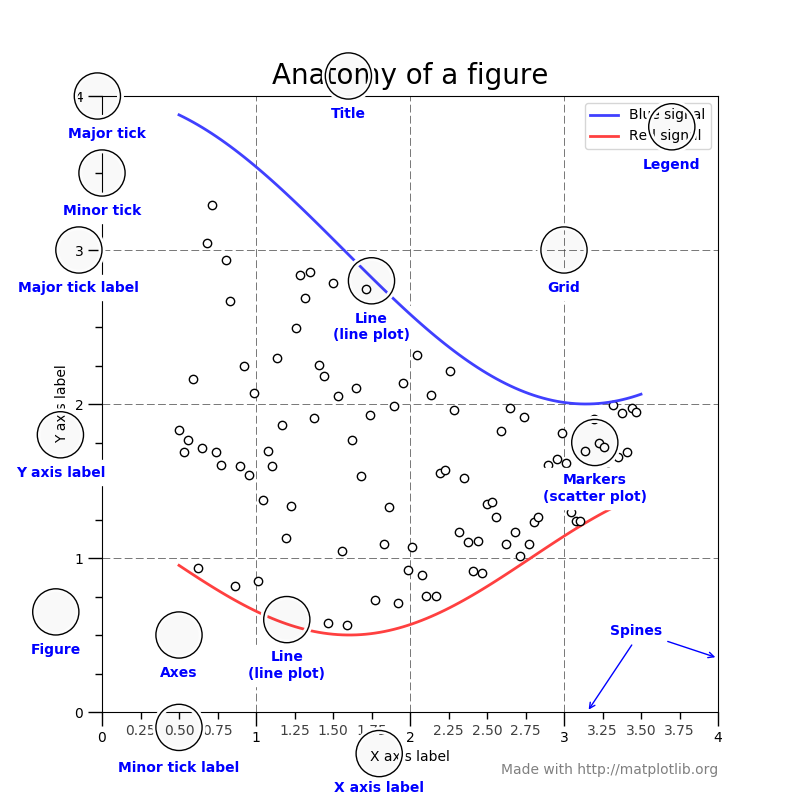

The most important properties of the `Axes` object are:
* two (or three in the case of 3D) `Axis` objects, which take care of the intervals in which data are plotted
* a title
* an x-label 
* a y-label

If no `Figure` and `Axes` objects are passed to matplotlib, the first call to `plt.plot` will automatically create figure and axes objects to create the desired plot. Subsequent functions will re-use the current axes object:

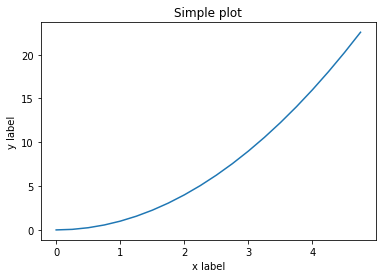

In [7]:
import numpy as np

x = np.arange(0, 5, 0.25)
y = x ** 2

plt.plot(x,y)

plt.title("Simple plot")
plt.xlabel('x label')
plt.ylabel('y label')

plt.show()

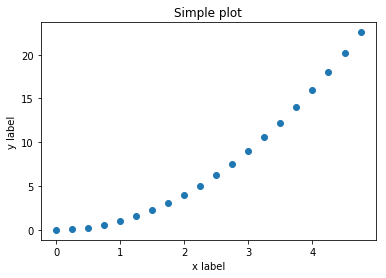

In [8]:
# for simple scatter plots
plt.plot(x,y,'o')

plt.title("Simple plot")
plt.xlabel('x label')
plt.ylabel('y label')

plt.show()

We can use layout managers such as `subplots` to manage explicitly the contents of plots:

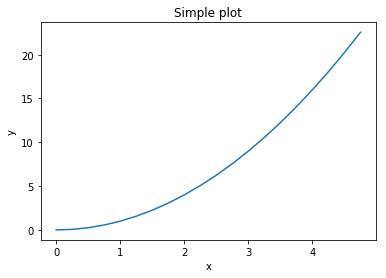

In [9]:
fig, axes = plt.subplots()

axes.plot(x, y)
axes.set_title('Simple plot');
axes.set_xlabel('x')
axes.set_ylabel('y')

plt.show()

We can also generate multiple plots in a single figure:

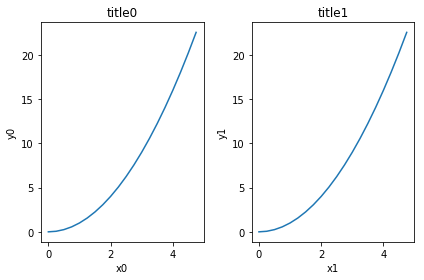

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for id,ax in enumerate(axes):
    ax.plot(x, y)
    ax.set_xlabel("x" + str(id))
    ax.set_ylabel("y" + str(id))
    ax.set_title('title' + str(id))
    
fig.tight_layout() # format properly multiple plots
plt.show()

### Figure size

Matplotlib allows many customizations of figures. For instance, the figure size can be specified when creating a figure:

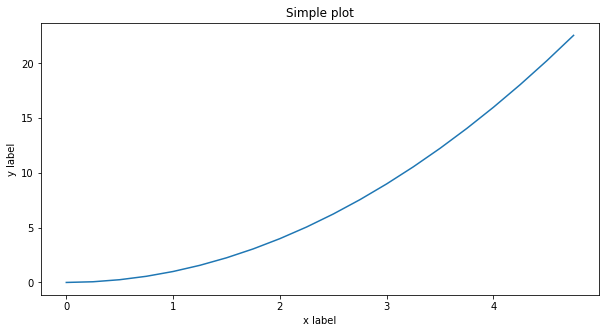

In [81]:
# create a 1000x500 image
fig = plt.figure(figsize=(10,5))

plt.plot(x,y)
plt.title("Simple plot")
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

### Export figures

To export a figure to a file, use the `savefig` method in the `Figure` class, specifying the format using the appropriate file extension:

In [82]:
fig.savefig("plot.svg")

### Multiple lines, legends and colors

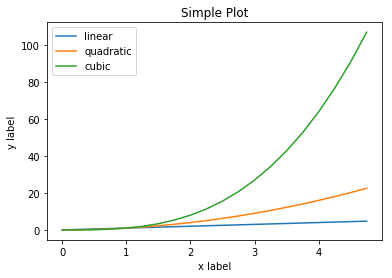

In [16]:
# when inserting multiple lines in a plot, you can specify customizations of each line for the legend immediately
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

plt.show()

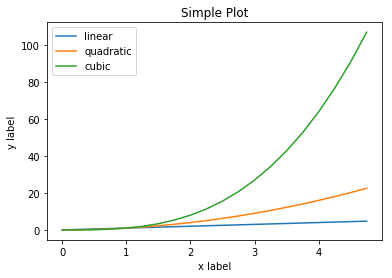

In [21]:
# but customizations can also be specified later in a list
plt.plot(x, x)
plt.plot(x, x**2)
plt.plot(x, x**3)

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend(["linear", "quadratic", "cubic"])

plt.show()

### Many customizations

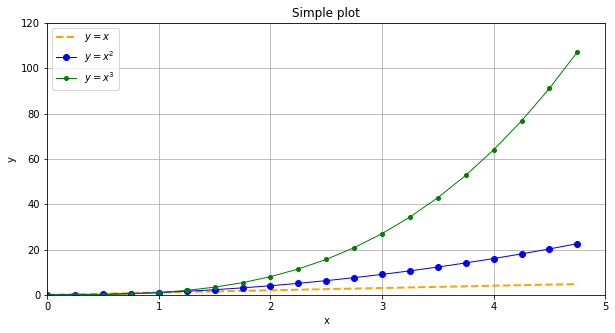

In [27]:
# some example customizations on matplotlib plots
figure, ax = plt.subplots(figsize=(10,5))

plt.xlabel("x")
plt.ylabel("y")
ax.plot(x, x, label="$y = x$", color="orange", lw=2, ls="--")
ax.plot(x, x**2, label="$y = x^2$", color="blue", lw=1, marker="o")
ax.plot(x, x**3, label="$y = x^3$", color="green", lw=1, marker="o", markersize=4)
ax.set_xlim([0,5])
ax.set_ylim([0,120])
ax.legend()
ax.set_title("Simple plot")
ax.grid(True)

plt.show()

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [157]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

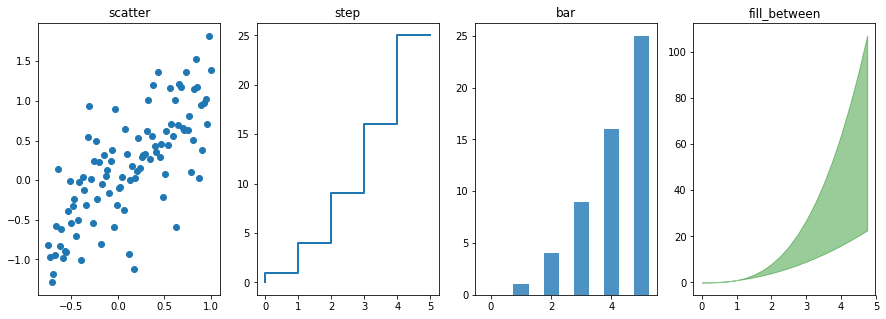

In [158]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))

axes[0].scatter(xx, xx + 0.5*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.8)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.4);
axes[3].set_title("fill_between");

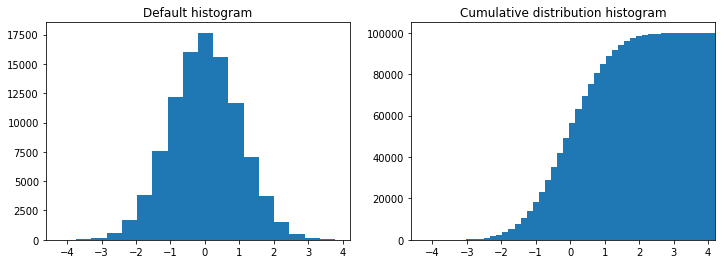

In [234]:
n = np.random.randn(100000)

fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n, bins = 20)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative distribution histogram")
axes[1].set_xlim((min(n), max(n)));

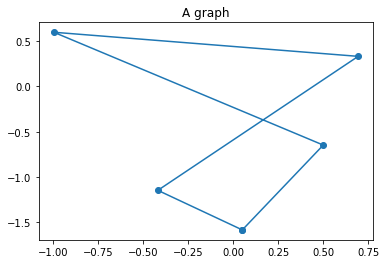

In [43]:
np.random.seed(4)
data1, data2 = np.random.randn(2, 5)

# add again the first point to obtain a connected graph
data1 = np.append(data1, data1[0])
data2 = np.append(data2, data2[0])

fig, ax = plt.subplots(1, 1)
ax.plot(data1, data2,'o-')
ax.set_title("A graph")

plt.show()

## 3D figures

To use 3D graphics in matplotlib, we use the `Axes3D` class:

In [45]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

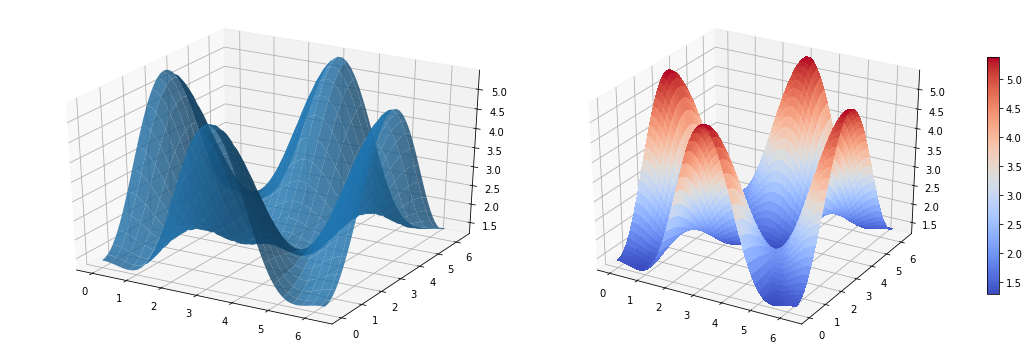

In [46]:
# function to be plotted
def flux_qubit_potential(phi_m, phi_p):
    alpha = 0.7
    phi_ext = 2 * np.pi * 0.5
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

# generate data points and compute the surface of the function
phi_m = np.linspace(0, 2*np.pi, 50)
phi_p = np.linspace(0, 2*np.pi, 50)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

# create the figure
fig = plt.figure(figsize=(15,5))

# create a 3D axes object for the first plot, and plot the surface computed before
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=2, alpha=0.8)

# create a 3D axes object for the second plot, and plot the surface computed before
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.7)

fig.tight_layout()

#### Change the view angle

We can change the view angle of a 3D plot using the `view_init` method, which takes as arguments: `elevation` and `azimuth` angle (in degrees):

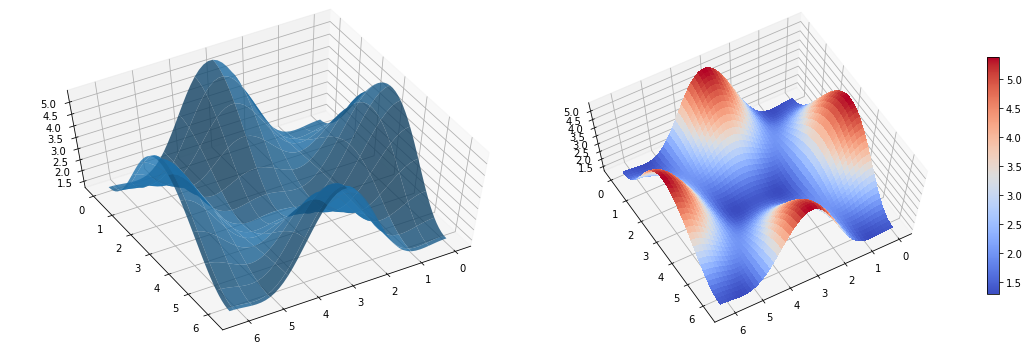

In [204]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.8)
ax.view_init(60, 60)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.7)
ax.view_init(70, 60)

fig.tight_layout()

## Further reading

For more information about matplotlib:
* http://www.matplotlib.org - The project web page for matplotlib.
* http://matplotlib.org/gallery.html - A gallery showing many of the plots that matplotlib can create.

## Exercise 7

Given the iris dataset CSV file and a new unseen vector representing a flower, define a function that classifies the new flower using its k-nearest neighbors. Apply the algorithm using $k \in \{5,10,20\}$ and print the label of the results.

Also, create 2-dimensional scatter plots of the iris dataset considering the given pairs of dimensions, and draw the points of each class with a different color. Take a look at the plots and answer the following question: if you could use only one of the given pairs to apply k-nearest neighbors, which pair would you use?

TIPS:
* the plots should be similar to the following:

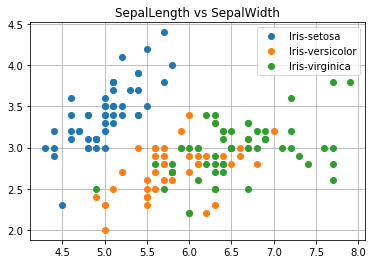

In [2]:
newFlower = [5.8, 3.0, 4.9, 1.6]

pairs = [("SepalLength","SepalWidth"),
         ("PetalLength","PetalWidth"),
         ("PetalLength","SepalLength"),
         ("PetalWidth","SepalWidth")]